In [1]:
import numpy as np
from numpy import linalg
import math
import heapq as hp
import matplotlib.pyplot as plt
from matplotlib import colors

In [ ]:
n=int(input('enter n: '))
grd=np.zeros((n,n))
for i in range(n):
  for j in range(n):
    grd[i][j]=4
b=int(input('num of blocked: '))
unreach = []

print('now enter coordinates')
for i in range(b):
  x=int(input())
  y=int(input())
  grd[x][y]=-1
  unreach.append([x,y])

print('enter start')
x=int(input())
y=int(input())
st=[x,y]
grd[x][y]=0

g=int(input('num of goals: '))
goal = []
print('enter coordinates of goals')
for i in range(g):
  x=int(input())
  y=int(input())
  grd[x][y]=1
  goal.append([x,y])


enter n: 5
num of blocked: 1
now enter coordinates
2
2
enter start
0
1
num of goals: 1
enter coordinates of goals
4
4


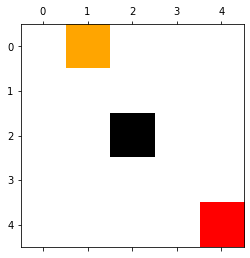

In [ ]:
#grd = generate(n,unreach,st,goal)
#block -1,start 0,goal 1,frontier 2,exp 3,unexp 4
col=colors.ListedColormap(['black','orange','red','green','blue','white'])
bound = [-1.5,-0.5,0.5,1.5,2.5,3.5,4.5]
nor = colors.BoundaryNorm(bound, col.N)

def disp(grd):
  n=len(grd)
  im=np.array(grd)
  plt.matshow(im,cmap=col,norm=nor)
  plt.show()

disp(grd)

In [ ]:
dx=[1,0,-1,0]
dy=[0,1,0,-1]

def ser(grid,src,gol,t):
  n=len(grid)
  vis=np.zeros((n,n))
  predx=np.zeros((n,n),dtype=int)
  predy=np.zeros((n,n),dtype=int)
  for i in range(n):
    for j in range(n):
      predx[i][j]=-10
      predy[i][j]=-10
  q=[]
  x=src[0]
  y=src[1]
  hp.heappush(q,[0,x,y])
  c=1
  vis[x][y]=1
  
  while(len(q)>0):
    z,x,y=hp.heappop(q)
    if(grid[x][y]==2):  #if frontier
      grid[x][y]=3      #then explored
    for i in range(4):
      x1=x+dx[i]
      y1=y+dy[i]
      if(x1>-1 and x1<n and y1>-1 and y1<n):
        if(grid[x1][y1]!=-1 and vis[x1][y1]==0):
          vis[x1][y1]=1
          predx[x1][y1]=x
          predy[x1][y1]=y
          if(grid[x1][y1]!=1):  #not goal
            grid[x1][y1]=2      #frontier
          hp.heappush(q,[t*c,x1,y1])
          c+=1
    disp(grid)

  for x,y in gol:
    path=[]
    print(x,y)
    while(x!=-10 and y!=-10):
      print(x,y)
      path.append([x,y])
      x,y=predx[x][y],predy[x][y]
    path.reverse()
    if(path[0]==src):
      print(*path,sep="--")
    else:
      print('No path')

Question 1 (BFS)

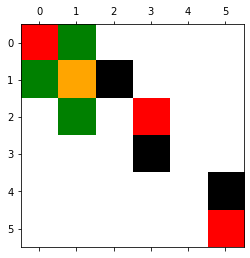

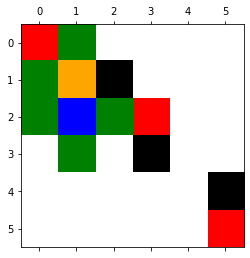

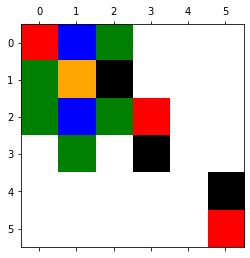

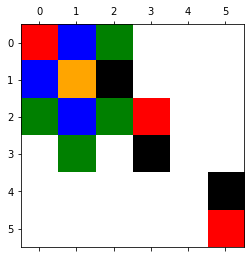

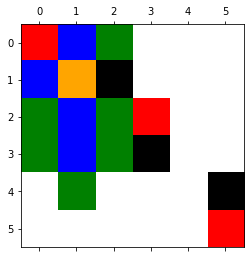

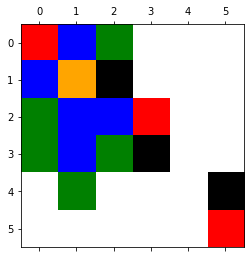

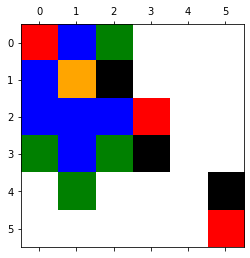

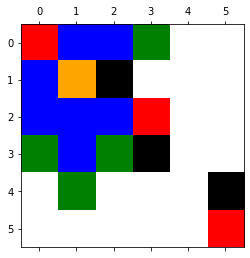

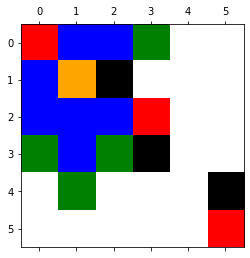

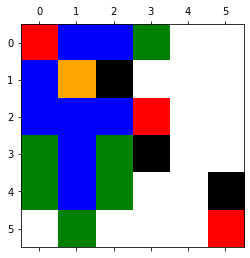

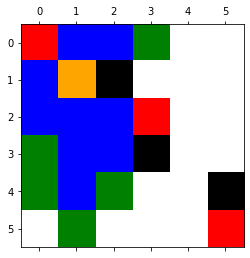

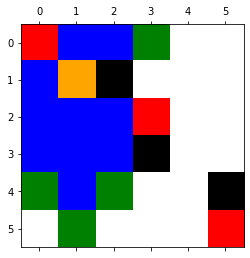

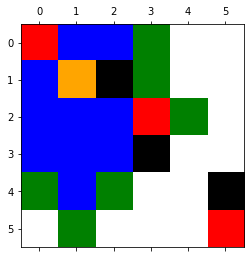

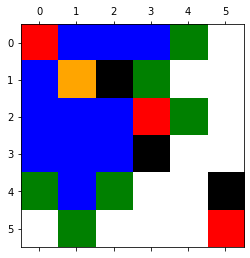

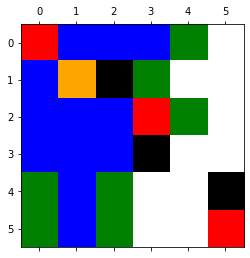

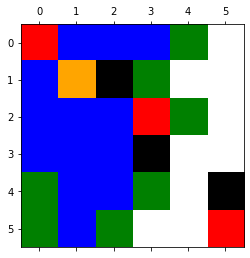

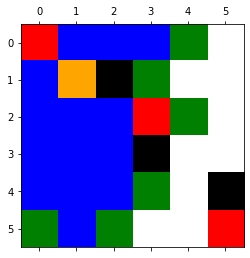

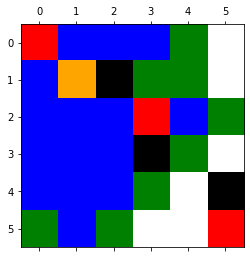

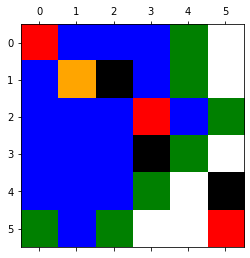

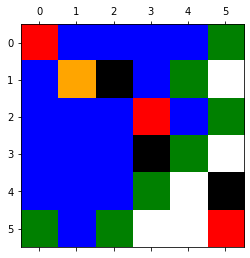

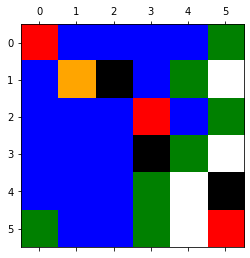

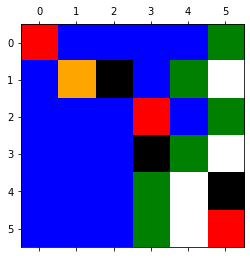

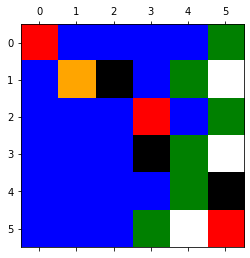

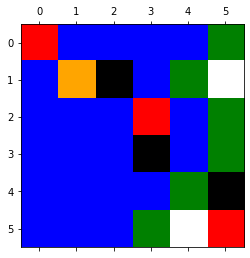

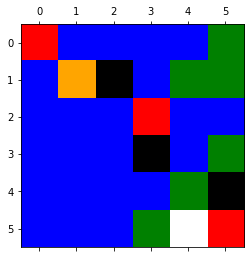

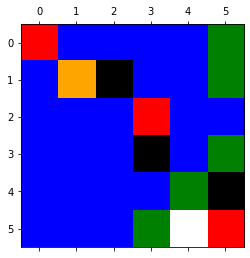

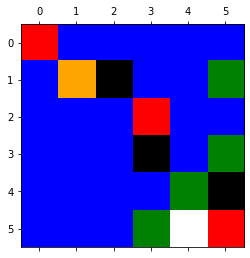

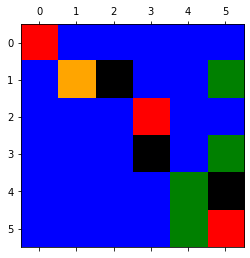

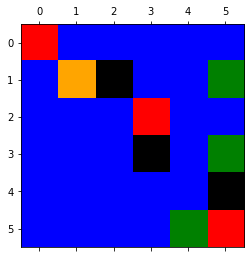

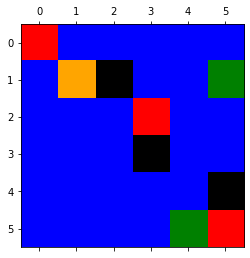

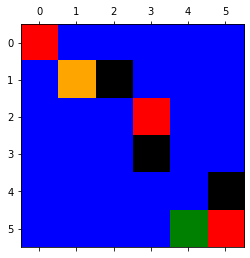

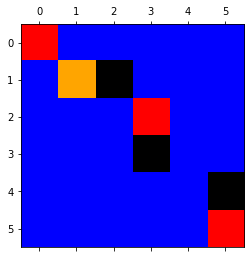

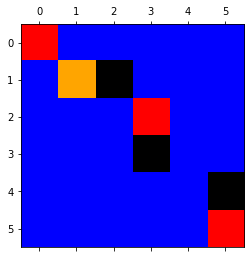

0 0
0 0
0 1
1 1
[1, 1]--[0, 1]--[0, 0]
5 5
5 5
5 4
5 3
5 2
5 1
4 1
3 1
2 1
1 1
[1, 1]--[2, 1]--[3, 1]--[4, 1]--[5, 1]--[5, 2]--[5, 3]--[5, 4]--[5, 5]
2 3
2 3
2 2
2 1
1 1
[1, 1]--[2, 1]--[2, 2]--[2, 3]


In [ ]:
tog=1
ser(grd,st,goal,tog)

Question 2 (DFS)

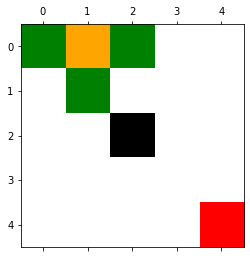

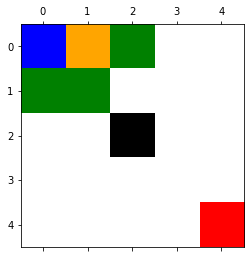

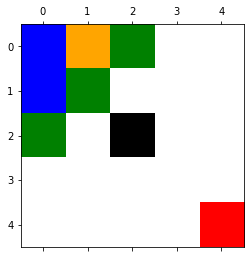

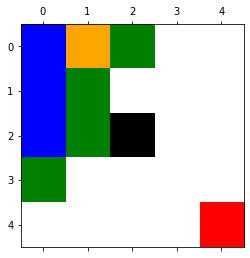

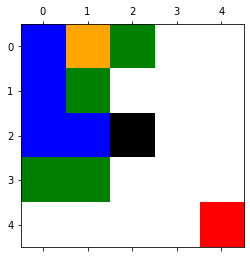

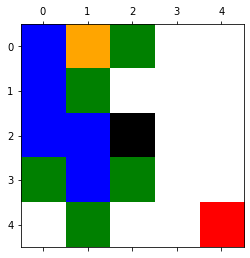

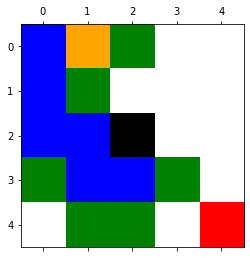

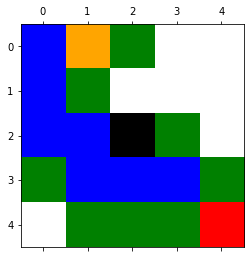

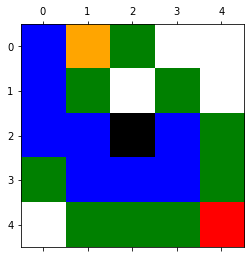

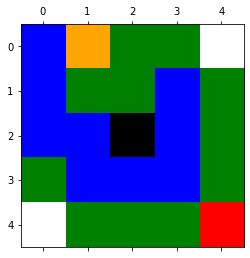

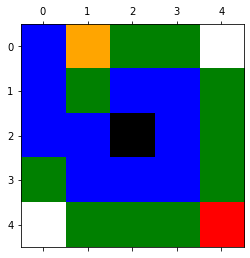

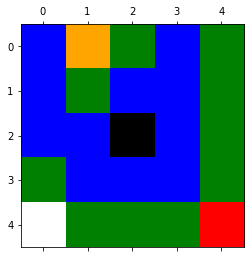

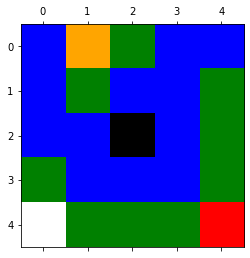

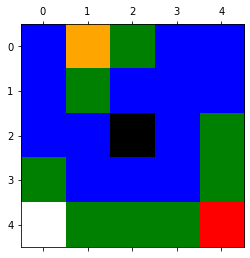

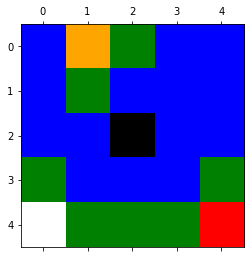

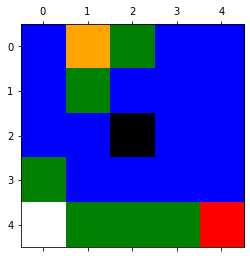

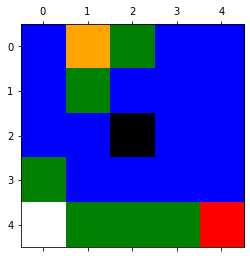

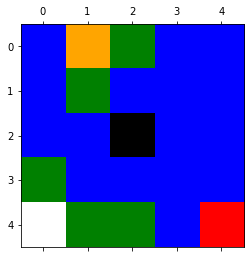

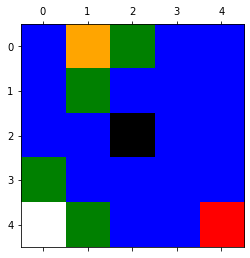

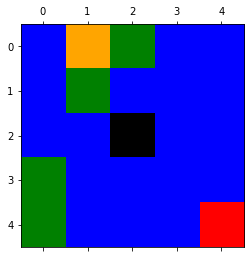

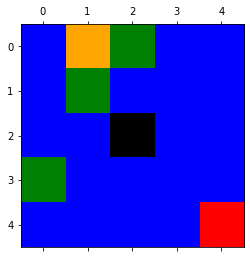

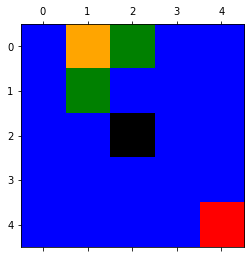

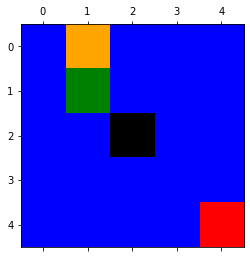

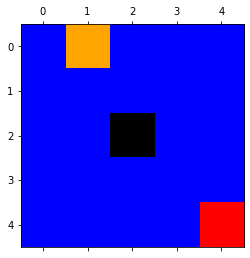

4 4
4 4
3 4
3 3
3 2
3 1
2 1
2 0
1 0
0 0
0 1
[0, 1]--[0, 0]--[1, 0]--[2, 0]--[2, 1]--[3, 1]--[3, 2]--[3, 3]--[3, 4]--[4, 4]


In [ ]:
tog=-1
ser(grd,st,goal,tog)

Question 3

In [2]:
oren = {}
st_no = {}
cnt=0

def grd_str(grd):
  s=''
  for i in range(3):
    for j in range(3):
      s+=grd[i][j]
  return s
  
def str_grd(inp):
  grd=[['0' for i in range(3)] for j in range(3)]
  c=0
  for i in range(3):
    for j in range(3):
      grd[i][j]=inp[c]
      c+=1
  return grd

In [3]:
def lbl(grd):
  s=''
  for i in range(9):
    s+=grd[i]
  if (s not in st_no):
    global cnt
    st_no[s]=cnt
    oren[cnt]=s
    cnt+=1

def all_possible(grd,x,y):
  if(x!=y):
    i=x
    while(i<=y):
      grd[i],grd[x]=grd[x],grd[i]
      all_possible(grd,x+1,y)
      grd[i],grd[x]=grd[x],grd[i]
      i+=1
  else:
    lbl(grd)

all_possible(['s','s','1','2','3','4','5','6','7'],0,8)
#print(cnt)

In [4]:
vis = [0 for i in range(cnt+1)]
pred = [0 for i in range(cnt+1)]
ind = [[-1,-1] for i in range(cnt+1)]

dx=[1,0,-1,0]
dy=[0,1,0,-1]

In [5]:
def bfs(sou):
  q=[]
  cou=1
  hp.heappush(q,[0,st_no[sou]])
  vis[st_no[sou]]=1
  
  while(len(q)):
    z=hp.heappop(q)
    c,cur=z
    grd=str_grd(oren[cur])
    fr=[]
    for i in range(3):
      for j in range(3):
        if(grd[i][j]=='s'):
          fr.append([i,j])
    for i in range(2):
      x1,y1=fr[i]
      for j in range(4):
        x=x1+dx[j]
        y=y1+dy[j]
        if(x>=0 and y>=0 and x<3 and y<3 and grd[x][y]!='s'):
          newG = [[grd[i][j] for j in range(3)] for i in range(3)]
          newG[x1][y1],newG[x][y] = newG[x][y],newG[x1][y1]
          s=grd_str(newG)
          if(vis[st_no[s]]==0):
            pred[st_no[s]]=cur
            ind[st_no[s]]=[x1,y1]
            vis[st_no[s]]=1
            hp.heappush(q,[cou,st_no[s]])
            cou+=1
print('Enter final orientation')
grd=[['0' for i in range(3)] for j in range(3)]
for i in range(3):
  for j in range(3):
    grd[i][j]=input()

bfs(grd_str(grd))

Enter final orientation
1
2
3
4
5
6
7
s
s


In [6]:
def path(strt):
  p=st_no[grd_str(strt)]
  pat=[]
  while(p!=0):
    pat.append(p)
    p=pred[p]
    for i in range(len(pat)):
      grd=str_grd(oren[pat[i]])
      print('Move the index:',ind[pat[i]])
      for j in range(3):
        print(grd[j])
      
strt =[['0' for i in range(3)] for j in range(3)]
print('starting position:')
for i in range(3):
  for j in range(3):
    strt[i][j]=input()

path(strt)

starting position:
2
s
3
1
s
7
4
5
6
Move the index: [1, 2]
['2', 's', '3']
['1', 's', '7']
['4', '5', '6']
Move the index: [1, 2]
['2', 's', '3']
['1', 's', '7']
['4', '5', '6']
Move the index: [2, 2]
['2', 's', '3']
['1', '7', 's']
['4', '5', '6']
Move the index: [1, 2]
['2', 's', '3']
['1', 's', '7']
['4', '5', '6']
Move the index: [2, 2]
['2', 's', '3']
['1', '7', 's']
['4', '5', '6']
Move the index: [2, 1]
['2', 's', '3']
['1', '7', '6']
['4', '5', 's']
Move the index: [1, 2]
['2', 's', '3']
['1', 's', '7']
['4', '5', '6']
Move the index: [2, 2]
['2', 's', '3']
['1', '7', 's']
['4', '5', '6']
Move the index: [2, 1]
['2', 's', '3']
['1', '7', '6']
['4', '5', 's']
Move the index: [0, 0]
['2', 's', '3']
['1', '7', '6']
['4', 's', '5']
Move the index: [1, 2]
['2', 's', '3']
['1', 's', '7']
['4', '5', '6']
Move the index: [2, 2]
['2', 's', '3']
['1', '7', 's']
['4', '5', '6']
Move the index: [2, 1]
['2', 's', '3']
['1', '7', '6']
['4', '5', 's']
Move the index: [0, 0]
['2', 's', '3']
[